#  Exercicio 1: 

In [1]:
# 1)a

def state_transition(s, a):
    
    num_rows = 10
    num_cols = 10

    
    current_row = (s - 1) // num_cols
    current_col = (s - 1) % num_cols

   
    new_row = current_row
    new_col = current_col
    
    # up = 0
    # down = 1 
    # left = 2
    # right = 3

    
    if a == 0 and current_row > 0:
        new_row -= 1
    elif a == 1 and current_row < num_rows - 1:
        new_row += 1
    elif a == 2 and current_col > 0:
        new_col -= 1
    elif a == 3 and current_col < num_cols - 1:
        new_col += 1

    
    if 0 <= new_row < num_rows and 0 <= new_col < num_cols:
        new_state = new_row * num_cols + new_col + 1
        return new_state
    else:
        return s



In [2]:
print(state_transition(1, 3))

2


In [3]:
# 1)b 

def reward_function(s):
    if s == 100:
        return 100  
    else:
        return 0  


In [4]:
print(reward_function(100))

100


In [5]:
#1)c

import random

def random_action():
    return random.randint(0,3)

In [6]:
action = random_action()
print("Randomly chosen action:", action)

Randomly chosen action: 0


In [7]:
# 1)d 

class RobotEnvironment:
    
    def __init__(self):
        self.number_moves = 0
        self.current_state = 1

    def is_over(self):
        if self.current_state == 100:
            self.number_moves = 0
            self.current_state = 1
            return True

        if self.number_moves == 1000:
            self.number_moves = 0
            self.current_state = 1
            return True

        else:
            return False

    def take_action(self, action):
        self.current_state = state_transition(self.current_state, action)
        self.number_moves += 1
        reward = reward_function(self.current_state)
        return reward
    

robot_env = RobotEnvironment()

#while not robot_env.is_over():
  #  action = random_action()
  #  reward = robot_env.take_action(action)
  #  print(f"Action: {action}, Current State: {robot_env.current_state}, Reward: {reward}")

In [8]:
# 1)e


import random
import statistics
import time

num_episodes = 30

episode_rewards = []
steps_to_goal = []
episode_runtimes = []

for episode in range(num_episodes):
    start_time = time.time()  
    robot_env = RobotEnvironment()  
    total_reward = 0
    steps = 0

   
    while not robot_env.is_over():
        action = random_action()
        reward = robot_env.take_action(action)
        total_reward += reward
        steps += 1

    end_time = time.time()  

    
    episode_rewards.append(total_reward / steps)  
    steps_to_goal.append(steps)
    episode_runtimes.append(end_time - start_time)


avg_steps_to_goal = statistics.mean(steps_to_goal)
stddev_steps_to_goal = statistics.stdev(steps_to_goal)
avg_runtimes = statistics.mean(episode_runtimes)
avg_rewards_per_step = statistics.mean(episode_rewards)

print("Average Steps to Goal:", avg_steps_to_goal)
print("Standard Deviation of Steps to Goal:", stddev_steps_to_goal)
print("Average Runtimes (seconds):", avg_runtimes)
print("Average Rewards per Step:", avg_rewards_per_step)


Average Steps to Goal: 579.7
Standard Deviation of Steps to Goal: 335.69959374622323
Average Runtimes (seconds): 0.0026596387227376304
Average Rewards per Step: 0.23566636522744955


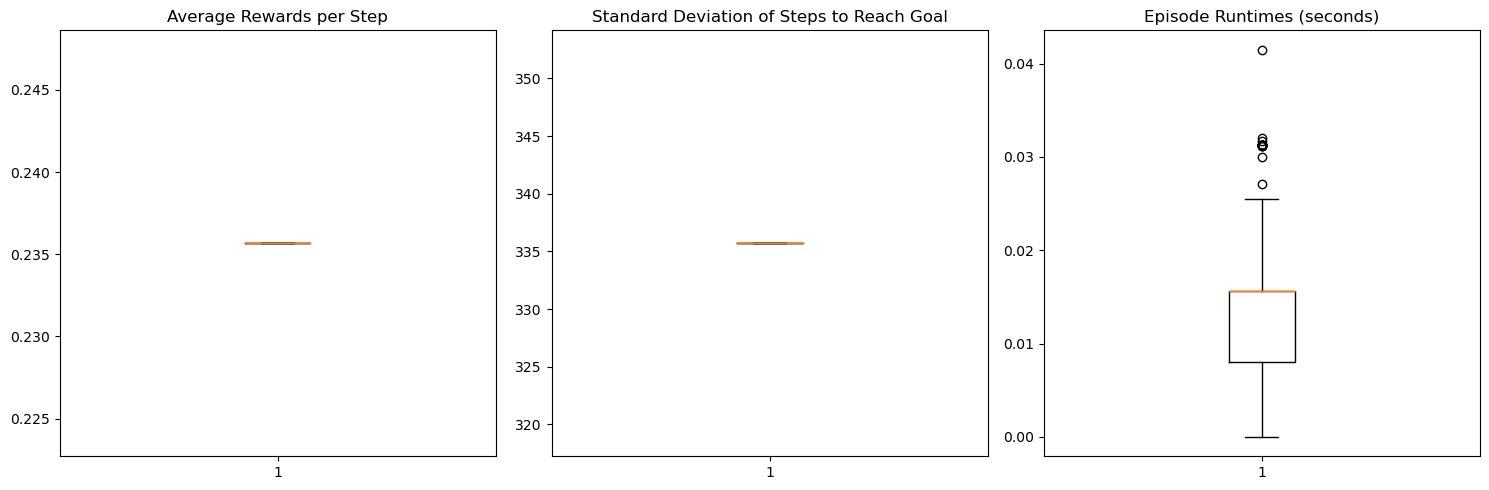

In [54]:
# 1)f

import matplotlib.pyplot as plt

average_rewards = [avg_rewards_per_step] * num_episodes
stddev_rewards = [0] * num_episodes  

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

axes[0].boxplot([average_rewards], vert=True)
axes[0].set_title('Average Rewards per Step')

axes[1].boxplot([stddev_steps_to_goal], vert=True)
axes[1].set_title('Standard Deviation of Steps to Reach Goal')

axes[2].boxplot([episode_runtimes], vert=True)
axes[2].set_title('Episode Runtimes (seconds)')
 
plt.tight_layout()
plt.show()

# Exercicio 2:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Average reward per step =  0.18016666666666667
Average Runtimes 0.0045045221845308936
Standard Deviation 0.0012877826223821151
Average Rewards 26.754583333333336
média é  [21.637500000000003, 26.225, 27.85, 24.737499999999997, 27.9125, 43.325, 27.79375, 21.78125, 18.60625, 21.69375, 24.74375, 34.06875, 23.20625, 34.00625, 24.793749999999996, 21.71875, 30.931250000000002, 37.13125, 27.8375, 23.25, 27.85625, 27.80625, 28.65, 20.118750000000002, 37.2875, 24.825, 18.59375, 27.85, 24.743750000000002, 21.65625]


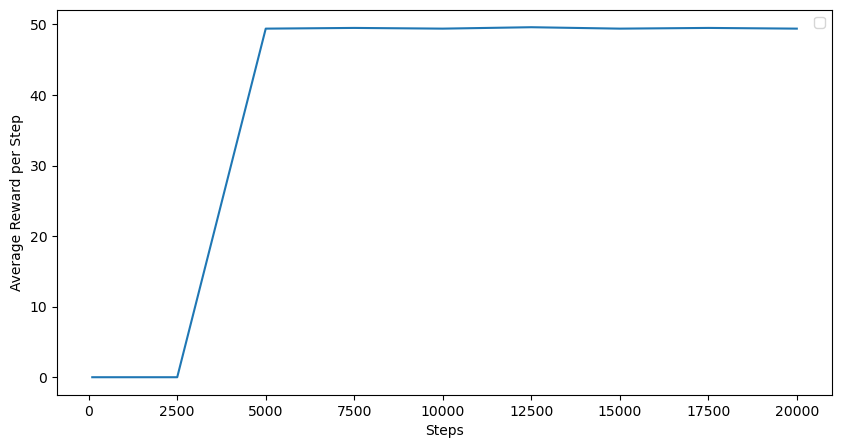

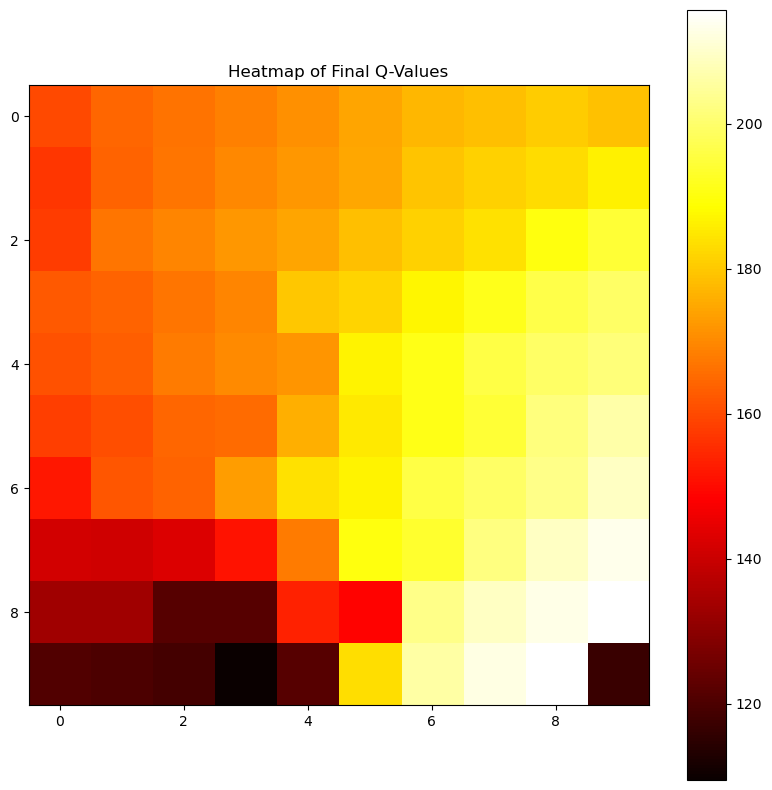

In [64]:
import random
import numpy as np
import time
import statistics
import matplotlib.pyplot as plt

num_states = 100
num_actions = 4
alpha = 0.7  # Learning rate
gamma = 0.99  # Discount factor

# Random action
def choose_random_action():
    return random.randint(0, num_actions - 1)

# Function to choose the best action based on the Q-matrix
def choose_best_action(state):
    return np.argmax(Q[state])

# Function to update the Q-matrix using Q-learning
def update_Q(state, action, reward, next_state):
    best_next_action = np.argmax(Q[next_state])
    Q[state, action] = (1 - alpha) * Q[state, action] + alpha * (reward + gamma * Q[next_state, best_next_action])

num_experiments = 30
num_steps_per_experiment = 20000
test_points = [100, 200, 500, 600, 700, 800, 900, 1000, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000]

average_rewards_per_step = []

robot_reward = []
total_average = []
runtimes = []

for experiment in range(num_experiments):
    
    Q = np.zeros((num_states, num_actions), dtype=float)
    robot_env = RobotEnvironment()

    episode_rewards = []
    episode_runtimes = []
    
    for step in range(1, num_steps_per_experiment + 1):
        action = random_action()
        current_state = robot_env.current_state
        reward = robot_env.take_action(action)
        next_state = robot_env.current_state
        
        robot_reward.append(reward)
        
        if robot_env.current_state == 100:
            robot_env.current_state = 1
        
        update_Q(current_state - 1, action, reward, next_state - 1)
        
        if step in test_points:
            test_reward = 0
            start_time = time.time()
            
            for _ in range(1000):
                best_action = choose_best_action(robot_env.current_state - 1)
                test_reward += robot_env.take_action(best_action)
            
            end_time = time.time()
            
            episode_rewards.append(test_reward / 1000)
            episode_runtimes.append(end_time - start_time)

    average_rewards_per_step.append(episode_rewards)
    
    
    runtimes.append(episode_runtimes)

# Average and standard deviation of runtimes
avg_runtimes = [np.mean(r) for r in runtimes]
stddev_runtimes = [np.std(r) for r in runtimes]
avg_rewards = [np.mean(r) for r in average_rewards_per_step]


print("Average reward per step = ",sum(robot_reward) / len(robot_reward))
print("Average Runtimes", sum(avg_runtimes) / len(avg_runtimes))
print("Standard Deviation", sum(stddev_runtimes) / len(stddev_runtimes))
print("Average Rewards", sum(avg_rewards) / len(avg_rewards))
#print("média é ", avg_rewards)

#Plot steps
plt.figure(figsize=(10, 5))
plt.plot(test_points, average_rewards_per_step[0])
plt.xlabel('Steps')
plt.ylabel('Average Reward per Step')
plt.legend()
plt.show()

#Heatmap
plt.figure(figsize=(10, 10))
plt.imshow(np.max(Q, axis=1).reshape(10, 10), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Heatmap of Final Q-Values')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Average reward per step =  4.169833333333333
Average Runtimes 0.011709256966908773
Standard Deviation 0.0027330512338491785
Average Rewards 40.13625
média é  [40.725, 63.224999999999994, 40.40625, 44.0875, 23.575000000000003, 15.79375, 30.862499999999997, 37.099999999999994, 43.7375, 24.65, 66.11250000000001, 41.8, 74.95625, 48.70625, 71.4, 29.818749999999998, 30.26875, 45.9625, 43.8, 27.393749999999997, 33.96875, 45.5, 24.86875, 46.79375, 53.0875, 34.724999999999994, 40.75, 24.6, 28.1375, 27.275]


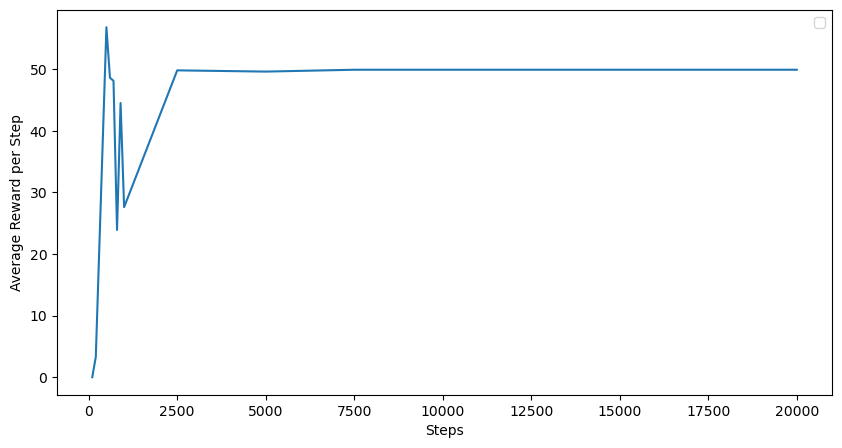

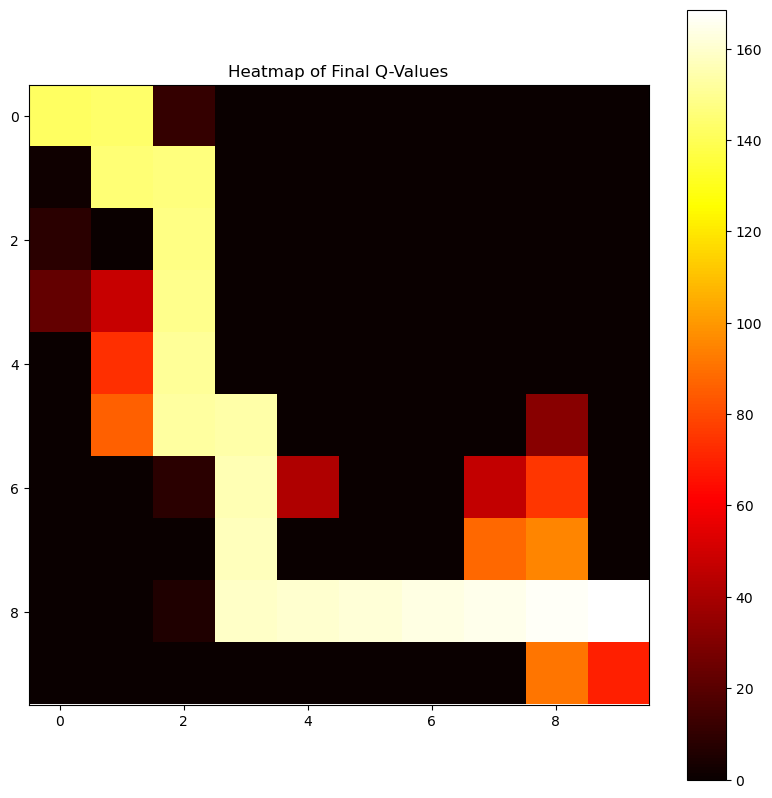

In [65]:
import random
import numpy as np
import time
import statistics
import matplotlib.pyplot as plt


num_states = 100
num_actions = 4
alpha = 0.7  # Learning rate
gamma = 0.99  # Discount factor



# Random action
def choose_random_action():
    return random.randint(0, num_actions - 1)

# Function to choose the best action based on the Q-matrix
def choose_best_action_with_tie_breaking(state):
    best_actions = [action for action, value in enumerate(Q[state]) if value == max(Q[state])]
    return random.choice(best_actions)

# Function to update the Q-matrix using Q-learning
def update_Q(state, action, reward, next_state):
    best_next_action = np.argmax(Q[next_state])
    Q[state, action] = (1 - alpha) * Q[state, action] + alpha * (reward + gamma * Q[next_state, best_next_action])


num_experiments = 30
num_steps_per_experiment = 20000
test_points = [100, 200, 500, 600, 700, 800, 900, 1000, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000]

average_rewards_per_step = []
runtimes = []

robot_reward = []

for experiment in range(num_experiments):
    
    Q = np.zeros((num_states, num_actions), dtype=float)

    
    robot_env = RobotEnvironment()
        
    episode_rewards = []
    episode_runtimes = []
    
    
    for step in range(1, num_steps_per_experiment + 1):
        action = choose_best_action_with_tie_breaking(robot_env.current_state - 1)
        current_state = robot_env.current_state
        reward = robot_env.take_action(action)
        next_state = robot_env.current_state
        
        robot_reward.append(reward)
        
        if robot_env.current_state == 100:
            robot_env.current_state = 1
            
            
        
        update_Q(current_state - 1, action, reward, next_state - 1)
        
        if step in test_points:
            test_reward = 0
            start_time = time.time()
            
            for _ in range(1000):
                best_action = choose_best_action_with_tie_breaking(robot_env.current_state - 1)
                test_reward += robot_env.take_action(best_action)
            
            end_time = time.time()
            
            episode_rewards.append(test_reward / 1000)
            episode_runtimes.append(end_time - start_time)

    average_rewards_per_step.append(episode_rewards)
    
    runtimes.append(episode_runtimes)

# Calculate average and standard deviation of runtimes
avg_runtimes = [np.mean(r) for r in runtimes]
stddev_runtimes = [np.std(r) for r in runtimes]
avg_rewards = [np.mean(r) for r in average_rewards_per_step]


print("Average reward per step = ",sum(robot_reward) / len(robot_reward))
print("Average Runtimes", sum(avg_runtimes) / len(avg_runtimes))
print("Standard Deviation", sum(stddev_runtimes) / len(stddev_runtimes))
print("Average Rewards", sum(avg_rewards) / len(avg_rewards))
#print("média é ", avg_rewards)


# Plot steps
plt.figure(figsize=(10, 5))
plt.plot(test_points, average_rewards_per_step[0])
plt.xlabel('Steps')
plt.ylabel('Average Reward per Step')
plt.legend()
plt.show()

#Heatmap
plt.figure(figsize=(10, 10))
plt.imshow(np.max(Q, axis=1).reshape(10, 10), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Heatmap of Final Q-Values')
plt.show()


    Comparando os valores entre o 2)a e o 2)b, primeiro avaliando os gráficos, pode-se reparar que o gráfico do exercício b, é mais direcionado, e rápido a estagnar num average reward. Enquanto no a, visto que se desloca de forma aleatória, é mais confuso, e demora mais tempo a estagnar num average reward.
    
    Quanto às HeatTables, podemos ver que a da alinea a, mais uma vez é mais confusa e assim não permite visualizar o melhor caminho a percorrer, enquanto o da alinea b, tem um caminho definido, porém, este pode não ser o melhor, visto que este algoritmo não verifica outras soluções, desde o momento em que encontra uma.
    
    O Average Runtime da solução b, é levemente mais alto, visto que usa sempre a matriz Q para decidir a melhor ação.

# Exercicio 3:

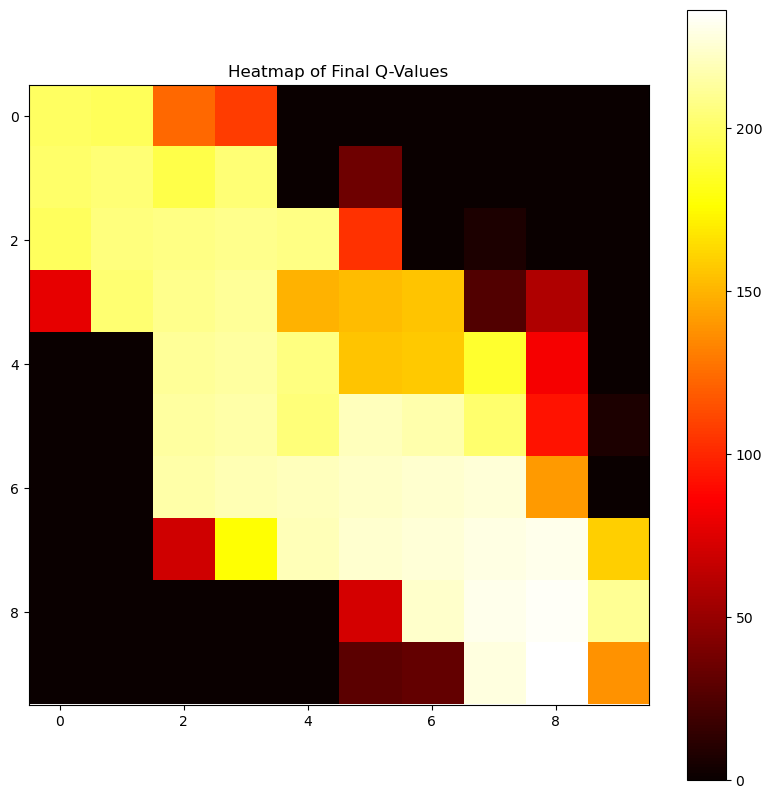

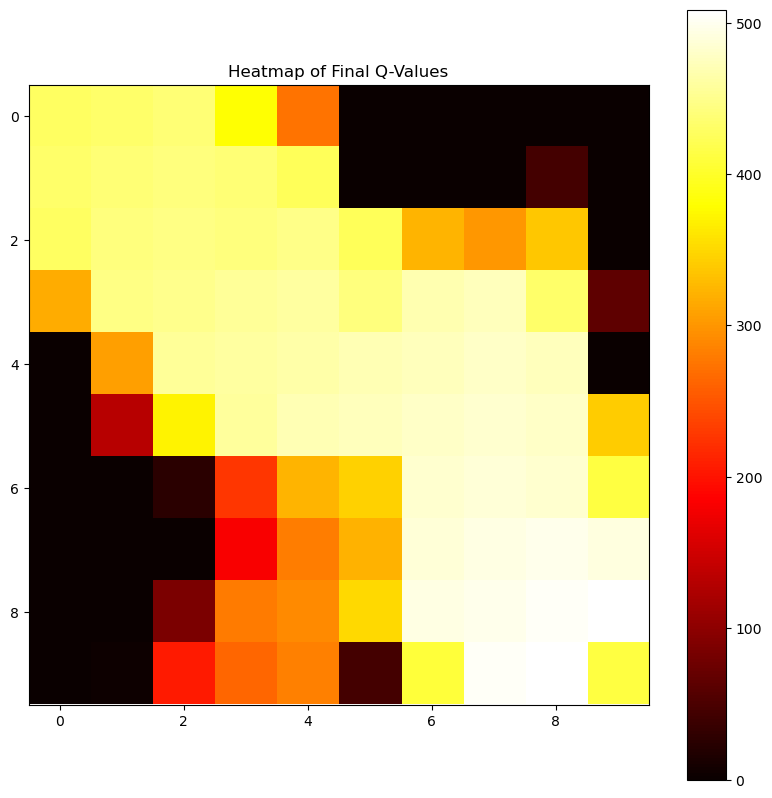

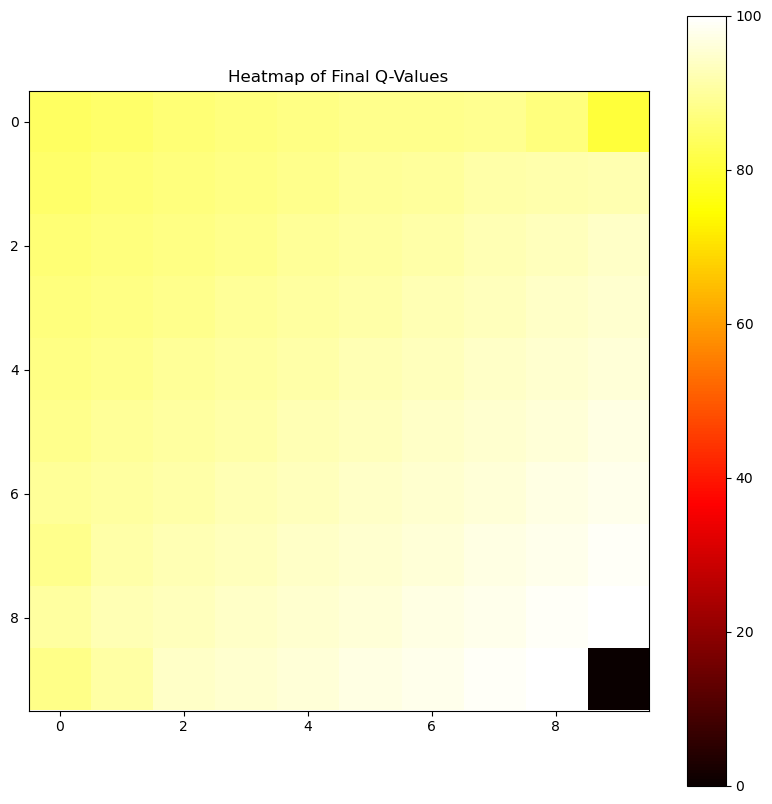

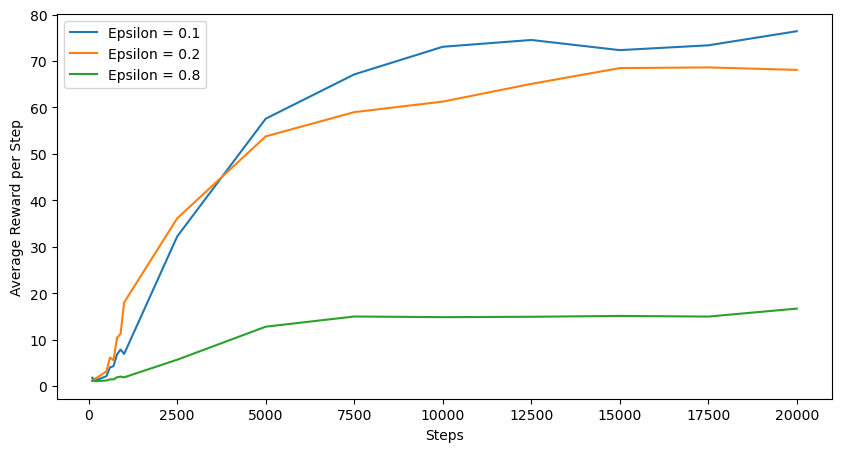

In [93]:
#1º parte do exercicio


import random
import numpy as np
import time
import statistics
import matplotlib.pyplot as plt


num_states = 100
num_actions = 4
alpha = 0.7  # Learning rate
gamma = 0.99  # Discount factor



# Random action
def choose_random_action():
    return random.randint(0, num_actions - 1)


def choose_action_with_epsilon_greedy(state, epsilon):
    if random.random() < epsilon:
        # Choose a random action with probability epsilon
        return random.randint(0, num_actions - 1)
    else:
        # Choose the best action based on Q-values with probability 1 - epsilon
        return choose_best_action(state)
    
def choose_best_action(state):
    best_actions = [action for action, value in enumerate(Q[state]) if value == max(Q[state])]
    return random.choice(best_actions)



def update_Q(state, action, reward, next_state):
    best_next_action = np.argmax(Q[next_state])
    Q[state, action] = (1 - alpha) * Q[state, action] + alpha * (reward + gamma * Q[next_state, best_next_action])


epsilon_values = [0.1, 0.2, 0.8]
test_steps = 1000
num_experiments = 30
num_steps_per_experiment = 20000
test_points = [100, 200, 500, 600, 700, 800, 900, 1000, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000]

x_values = test_points


average_rewards_per_epsilon = []


for epsilon in epsilon_values:
    episode_rewards = []
    
    
    for experiment in range(num_experiments):
    
        robot_env = RobotEnvironment()
        
        experiment_rewards = []
        
        Q = np.zeros((num_states, num_actions), dtype=float)

        
        
        epsilon_schedule = [epsilon] * num_steps_per_experiment
        
    
    
    
        for step in range(1, num_steps_per_experiment + 1):
            current_state = robot_env.current_state
            action = choose_action_with_epsilon_greedy(robot_env.current_state - 1,epsilon_schedule[step - 1])
            reward = robot_env.take_action(action)
            next_state = robot_env.current_state
        
            if robot_env.current_state == 100:
                robot_env.current_state = 1
            
            
            update_Q(current_state - 1, action, reward, next_state - 1)
        
        
        
            if step in test_points:
                test_reward = 0
            
                for _ in range(1000):
                    best_action = choose_action_with_epsilon_greedy(robot_env.current_state - 1,epsilon_schedule[step - 1])
                    test_reward += robot_env.take_action(best_action)
            
            
                average_test_reward = test_reward / 1000
                experiment_rewards.append(average_test_reward)
                
        episode_rewards.append(experiment_rewards)

    average_rewards_per_epsilon.append(np.mean(episode_rewards, axis=0))
    #Heatmap
    plt.figure(figsize=(10, 10))
    plt.imshow(np.max(Q, axis=1).reshape(10, 10), cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title('Heatmap of Final Q-Values')
    plt.show()

        
#print(average_rewards_per_epsilon)
    
   # Calculate the average reward per step across all experiments for each epsilon value
#average_rewards_per_step = np.mean(average_rewards_per_epsilon, axis=0)
#x_values = range(1000, num_steps_per_experiment + 1, 1000)  # X-values for the plot

plt.figure(figsize=(10, 5))
for i, epsilon in enumerate(epsilon_values):
    if len(x_values) != len(average_rewards_per_epsilon[i]):
        raise ValueError(f"Shape mismatch: x_values has shape {len(x_values)}, but "
                         f"average_rewards_per_epsilon[{i}] has shape {len(average_rewards_per_epsilon[i])}")
    plt.plot(x_values, average_rewards_per_epsilon[i], label=f'Epsilon = {epsilon}')

plt.xlabel('Steps')
plt.ylabel('Average Reward per Step')
plt.legend()
plt.show()





    Observando o gráfico, e vendo as opções com menor epsilon, ou seja, que se baseiam menos em valores aleatórios, pode-se constatar que têm um valor mais alto de average reward. Quanto à opção com o epsilon alto, ou seja, que se baseia mais em valores aleatórios, pode-se observar que o robot está mais baralhado, e tem um average reward mais baixo.
    O mesmo se pode constatar pelos Heat Maps

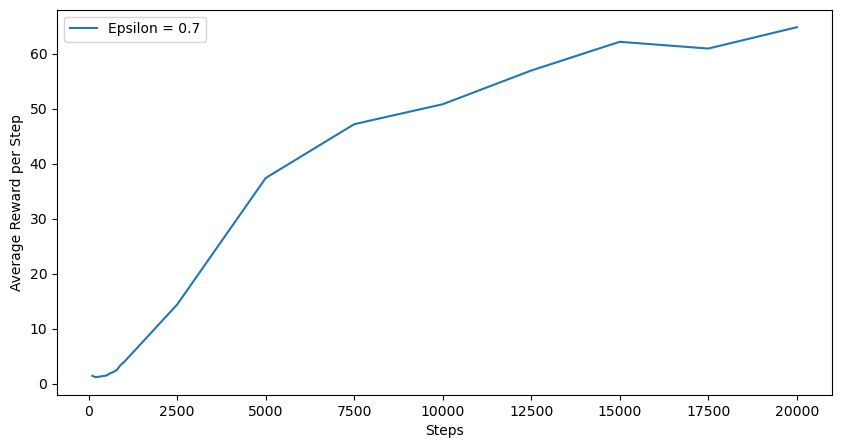

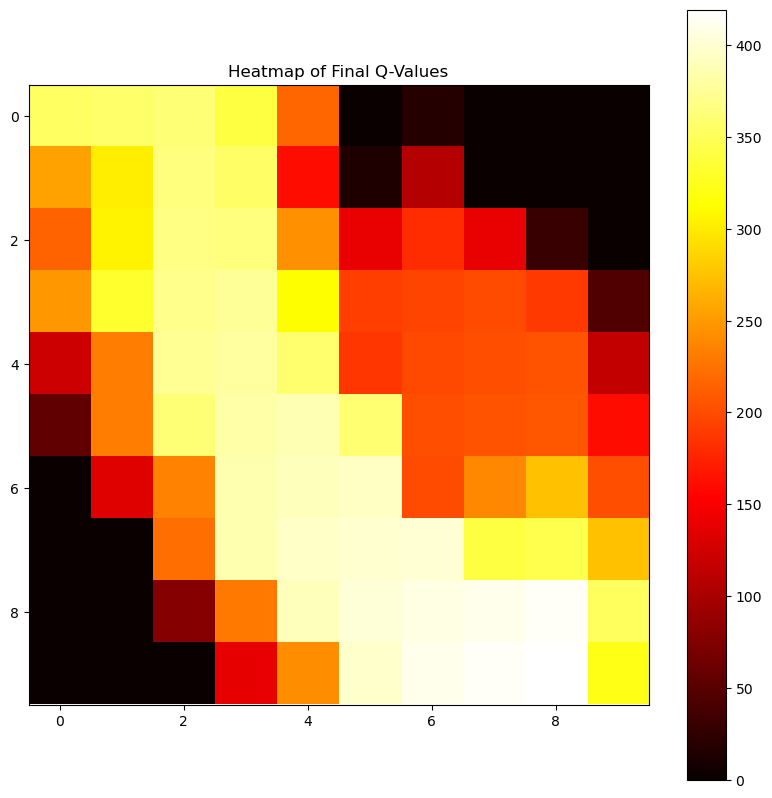

In [92]:
#2º parte do exercicio 


import random
import numpy as np
import time
import statistics
import matplotlib.pyplot as plt


num_states = 100
num_actions = 4
alpha = 0.7  # Learning rate
gamma = 0.99  # Discount factor



# Random action
def choose_random_action():
    return random.randint(0, num_actions - 1)


def choose_action_with_epsilon_greedy(state, epsilon):
    if random.random() < epsilon:
        # Choose a random action with probability epsilon
        return random.randint(0, num_actions - 1)
    else:
        # Choose the best action based on Q-values with probability 1 - epsilon
        return choose_best_action(state)
    
def choose_best_action(state):
    best_actions = [action for action, value in enumerate(Q[state]) if value == max(Q[state])]
    return random.choice(best_actions)



def update_Q(state, action, reward, next_state):
    best_next_action = np.argmax(Q[next_state])
    Q[state, action] = (1 - alpha) * Q[state, action] + alpha * (reward + gamma * Q[next_state, best_next_action])


epsilon_values = [0.7]
test_steps = 1000
num_experiments = 30
num_steps_per_experiment = 20000
test_points = [100, 200, 500, 600, 700, 800, 900, 1000, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000]

x_values = test_points


average_rewards_per_epsilon = []


for epsilon in epsilon_values:
    episode_rewards = []
    
    
    for experiment in range(num_experiments):
    
        robot_env = RobotEnvironment()
        
        experiment_rewards = []
        
        Q = np.zeros((num_states, num_actions), dtype=float)

        
        
        epsilon_schedule = [epsilon * (1 - step / num_steps_per_experiment) for step in range(num_steps_per_experiment)]
        
    
    
    
        for step in range(1, num_steps_per_experiment + 1):
            current_state = robot_env.current_state
            action = choose_action_with_epsilon_greedy(robot_env.current_state - 1,epsilon_schedule[step - 1])
            reward = robot_env.take_action(action)
            next_state = robot_env.current_state
        
            if robot_env.current_state == 100:
                robot_env.current_state = 1
            
            
            update_Q(current_state - 1, action, reward, next_state - 1)
        
        
        
            if step in test_points:
                test_reward = 0
            
                for _ in range(1000):
                    best_action = choose_action_with_epsilon_greedy(robot_env.current_state - 1,epsilon_schedule[step - 1])
                    test_reward += robot_env.take_action(best_action)
            
            
                average_test_reward = test_reward / 1000
                experiment_rewards.append(average_test_reward)
                
        episode_rewards.append(experiment_rewards)

    average_rewards_per_epsilon.append(np.mean(episode_rewards, axis=0))

        
#print(average_rewards_per_epsilon)
    
   # Calculate the average reward per step across all experiments for each epsilon value
#average_rewards_per_step = np.mean(average_rewards_per_epsilon, axis=0)
#x_values = range(1000, num_steps_per_experiment + 1, 1000)  # X-values for the plot

plt.figure(figsize=(10, 5))
for i, epsilon in enumerate(epsilon_values):
    if len(x_values) != len(average_rewards_per_epsilon[i]):
        raise ValueError(f"Shape mismatch: x_values has shape {len(x_values)}, but "
                         f"average_rewards_per_epsilon[{i}] has shape {len(average_rewards_per_epsilon[i])}")
    plt.plot(x_values, average_rewards_per_epsilon[i], label=f'Epsilon = {epsilon}')

plt.xlabel('Steps')
plt.ylabel('Average Reward per Step')
plt.legend()
plt.show()



#Heatmap
plt.figure(figsize=(10, 10))
plt.imshow(np.max(Q, axis=1).reshape(10, 10), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Heatmap of Final Q-Values')
plt.show()

    Começando com valores aleatórios a 70% e descendo até 0, podemos observar pelo heatmap, que o robot testou alguns caminhos até chegar à sua melhor solução. Visto isto, pode-se chegar à conclusão que esta é uma abordagem competente para este problema.

# Exercicio 4:

In [84]:
#New Robot Environment Class with Walls


class RobotEnvironmentWalls:
    
    def __init__(self):
        self.number_moves = 0
        self.current_state = 1
        
        self.walls = [4,24,34,44,54,64,74,84,17,27,37,47,57,67,77,87,97]  
        
        

    def is_over(self):
        if self.current_state == 100:
            self.number_moves = 0
            self.current_state = 1
            return True

        if self.number_moves == 1000:
            self.number_moves = 0
            self.current_state = 1
            return True

        else:
            return False

    def take_action(self, action):
        
        next_state = state_transition(self.current_state, action)

        if next_state in self.walls:
            reward = -0.1  
        else:
            
            self.current_state = next_state
            reward = reward_function(self.current_state)

        self.number_moves += 1
        return reward

robot_envv = RobotEnvironmentWalls()

#while not robot_envv.is_over():
 #   action = random_action()
  #  reward = robot_envv.take_action(action)
   # print(f"Action: {action}, Current State: {robot_envv.current_state}, Reward: {reward}")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Average reward per step =  0.61515100000001
Average Runtimes 0.011167095601558685
Standard Deviation 0.0020279101080796624
Average Rewards 18.47237708333333
média é  [20.19165, 20.733137499999998, 15.952100000000005, 8.078137500000002, 20.11060625, 25.37213125, 8.4847, 2.0037000000000003, 23.923143749999998, 20.847381249999998, 6.0414625000000015, 18.704124999999998, 29.91548125, 14.653937500000001, 14.22689375, 26.497775, 49.7218125, 8.20403125, 28.065112500000005, 10.310337500000001, 21.510300000000004, 15.29055625, 25.866443750000002, 14.335925, 10.129100000000001, 28.28490625, 8.984975, 30.142175, 14.941074999999998, 12.648200000000003]


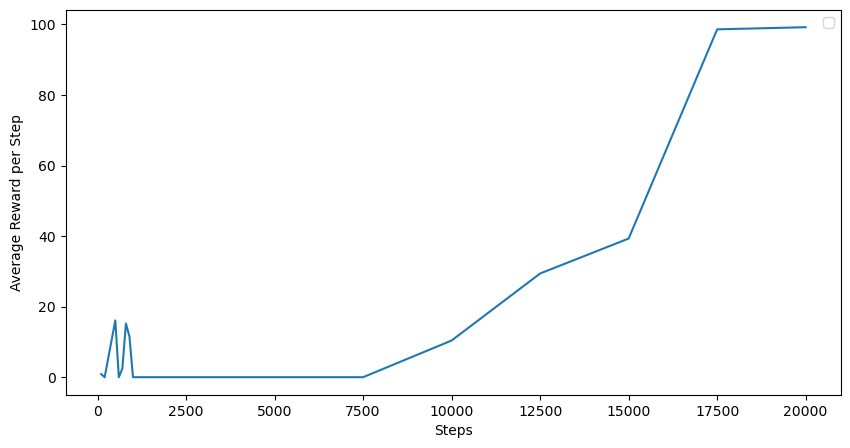

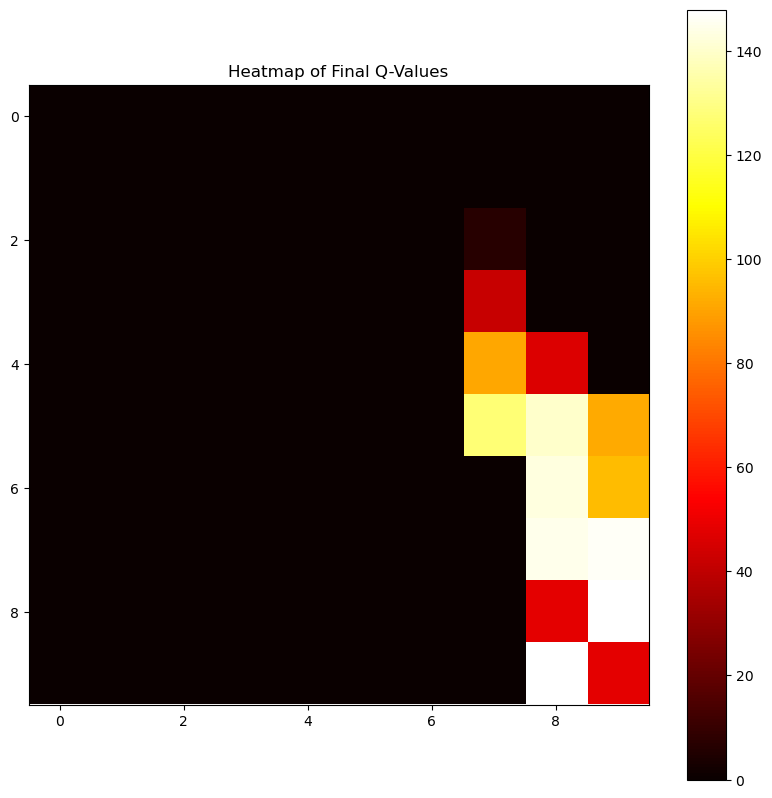

In [88]:
import random
import numpy as np
import time
import statistics
import matplotlib.pyplot as plt


num_states = 100
num_actions = 4
alpha = 0.7  # Learning rate
gamma = 0.99  # Discount factor



# Random action
def choose_random_action():
    return random.randint(0, num_actions - 1)

# Function to choose the best action based on the Q-matrix
def choose_best_action_with_tie_breaking(state):
    best_actions = [action for action, value in enumerate(Q[state]) if value == max(Q[state])]
    return random.choice(best_actions)

# Function to update the Q-matrix using Q-learning
def update_Q(state, action, reward, next_state):
    best_next_action = np.argmax(Q[next_state])
    Q[state, action] = (1 - alpha) * Q[state, action] + alpha * (reward + gamma * Q[next_state, best_next_action])


num_experiments = 30
num_steps_per_experiment = 20000
test_points = [100, 200, 500, 600, 700, 800, 900, 1000, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000]

average_rewards_per_step = []
runtimes = []

robot_reward = []

for experiment in range(num_experiments):
    
    Q = np.zeros((num_states, num_actions), dtype=float)

    
    robot_env = RobotEnvironmentWalls()
        
    episode_rewards = []
    episode_runtimes = []
    
    
    for step in range(1, num_steps_per_experiment + 1):
        action = choose_best_action_with_tie_breaking(robot_env.current_state - 1)
        current_state = robot_env.current_state
        reward = robot_env.take_action(action)
        next_state = robot_env.current_state
        
        robot_reward.append(reward)
        
        if robot_env.current_state == 100:
            robot_env.current_state = 1
            
            
        
        update_Q(current_state - 1, action, reward, next_state - 1)
        
        if step in test_points:
            test_reward = 0
            start_time = time.time()
            
            for _ in range(1000):
                best_action = choose_best_action_with_tie_breaking(robot_env.current_state - 1)
                test_reward += robot_env.take_action(best_action)
            
            end_time = time.time()
            
            episode_rewards.append(test_reward / 1000)
            episode_runtimes.append(end_time - start_time)

    average_rewards_per_step.append(episode_rewards)
    
    runtimes.append(episode_runtimes)

# Calculate average and standard deviation of runtimes
avg_runtimes = [np.mean(r) for r in runtimes]
stddev_runtimes = [np.std(r) for r in runtimes]
avg_rewards = [np.mean(r) for r in average_rewards_per_step]


print("Average reward per step = ",sum(robot_reward) / len(robot_reward))
print("Average Runtimes", sum(avg_runtimes) / len(avg_runtimes))
print("Standard Deviation", sum(stddev_runtimes) / len(stddev_runtimes))
print("Average Rewards", sum(avg_rewards) / len(avg_rewards))
print("média é ", avg_rewards)


# Plot steps
plt.figure(figsize=(10, 5))
plt.plot(test_points, average_rewards_per_step[0])
plt.xlabel('Steps')
plt.ylabel('Average Reward per Step')
plt.legend()
plt.show()

#Heatmap
plt.figure(figsize=(10, 10))
plt.imshow(np.max(Q, axis=1).reshape(10, 10), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Heatmap of Final Q-Values')
plt.show()


Usando o algoritmo da alinea 2)b e comparando os resultados podemos ver,pelo gráfico que demora muito mais tempo, a chegar a uma boa average reward. E observando o heat map, pode-se concluir que só mais perto do objetivo é que o robot consegue definir um caminho.

# Exercicio 5

    A exploração agora torna-se mais crucial, visto que precisa de perceber a variabilidade nas transições de estado. Noutra perspetiva, alcançar uma estimativa precisa dos valores Q, torna-se mais desafiador já que agora o robot teria de levar em conta a natureza probabilística das transições. Por isto teriamos de pensar noutras maneiras de fazer a atualização dos valores da matriz Q, usando mais exploração com transições aleatórias.

# Exercicio 6

    Poderiamos transformar os valores NA, em 0, e tornar os valores decimais em inteiros, assim se o valor for entre 0 e 0,5, vale 0, e se for entre 0,5 e 1, vale 1. Por exemplo, no caso dado no enunciado,NA, 0.56, NA, 0.14, este tornar-se-ia, num valor 0100.

    Esta transformação traria alguns riscos, visto que, teria várias posições diferentes, que seriam representados pelo mesmo estado. Por exemplo, nalguns casos em que distancia às paredes for igual, como nas colunas 2 e 9 na figura 4, o estado será igual para os 2 casos, mas o robot estará em posições completamente diferentes.Isto obriga a que o robot necessite de uma significativa maior quantidade de memória e computação, para gerir e aprender os valores Q.